# briefing

In [1]:
print(" cleaning and processing of data.\n splitting data into two data set according to condition. \n MODELS USED: ridgeCV,random forest,Ada boost,extremely randomized treees,SVM. \n HYPERTUNING OF PARAMETERS: gridsearch CV and random searchCV on SVM and by visualising rsme graph for RidgeCV. \n NO. OF CROSS VALIDATIONS: 3 fold. \n OUTPUT GRAPHS: histogram. \n METRICS: rsme, R2 scores \n now removing outliers(>0.2 dex) and running again.\n Finally ranking the features according to their importance.")
# breif


 cleaning and processing of data.
 splitting data into two data set according to condition. 
 MODELS USED: ridgeCV,random forest,Ada boost,extremely randomized treees,SVM. 
 HYPERTUNING OF PARAMETERS: gridsearch CV and random searchCV on SVM and by visualising rsme graph for RidgeCV. 
 NO. OF CROSS VALIDATIONS: 3 fold. 
 OUTPUT GRAPHS: histogram. 
 METRICS: rsme, R2 scores 
 now removing outliers(>0.2 dex) and running again.
 Finally ranking the features according to their importance.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn


# cleaning and processing data

In [3]:
raw_data=pd.read_csv("complete_rawdata.csv")
raw_data.columns

Index(['plate', 'mjd', 'fiberid', 'h_beta', 'h_alpha', 'u', 'g', 'r', 'i', 'z',
       'err_r', 'c_u', 'c_g', 'c_r', 'c_i', 'c_z', 'extinction_u',
       'extinction_g', 'extinction_r', 'extinction_i', 'extinction_z', 'z_p',
       'z_s', 'zwarning', 'metallicity', 'mass', 'OII', 'OIII', 'NII', 'AGN'],
      dtype='object')

c_u,c_g,c_r,c_i,c_z are "C" magnitudes and z_s is spectroscopic redshift and z_p is photometric redshift

removing objects with AGN flag

In [4]:
raw_data.drop(raw_data[raw_data["AGN"]==1].index,inplace=True)
len(raw_data)

166669

removing objects with redshift warning

In [5]:
raw_data.drop(raw_data[(raw_data["zwarning"]!=0)].index,inplace=True)
len(raw_data)

166429

removing objects with error in r band magnitude > 0.15 (magnitude cut)

In [6]:
raw_data.drop(raw_data[raw_data["err_r"]>0.15].index,inplace=True)
len(raw_data)

166246

dust correction

In [7]:
raw_data["u"]=raw_data["u"]+raw_data["extinction_u"] 
raw_data["g"]=raw_data["g"]+raw_data["extinction_g"]                  
raw_data["r"]=raw_data["r"]+raw_data["extinction_r"]                  
raw_data["i"]=raw_data["i"]+raw_data["extinction_i"]                   
raw_data["z"]=raw_data["z"]+raw_data["extinction_z"]                                    

adding colors

In [8]:
raw_data["u-g"]=raw_data["u"]-raw_data["g"] 
raw_data["u-r"]=raw_data["u"]-raw_data["r"] 
raw_data["u-i"]=raw_data["u"]-raw_data["i"] 
raw_data["u-z"]=raw_data["u"]-raw_data["z"] 
raw_data["g-r"]=raw_data["g"]-raw_data["r"] 
raw_data["g-i"]=raw_data["g"]-raw_data["i"] 
raw_data["g-z"]=raw_data["g"]-raw_data["z"] 
raw_data["r-i"]=raw_data["r"]-raw_data["i"] 
raw_data["r-z"]=raw_data["r"]-raw_data["z"] 
raw_data["i-z"]=raw_data["i"]-raw_data["z"] 
raw_data["(u-g)^2"]=(raw_data["u"]-raw_data["g"])**2
raw_data["(u-r)^2"]=(raw_data["u"]-raw_data["r"])**2 
raw_data["(u-i)^2"]=(raw_data["u"]-raw_data["i"])**2
raw_data["(u-z)^2"]=(raw_data["u"]-raw_data["z"])**2 
raw_data["(g-r)^2"]=(raw_data["g"]-raw_data["r"])**2 
raw_data["(g-i)^2"]=(raw_data["g"]-raw_data["i"])**2 
raw_data["(g-z)^2"]=(raw_data["g"]-raw_data["z"])**2 
raw_data["(r-i)^2"]=(raw_data["r"]-raw_data["i"])**2 
raw_data["(r-z)^2"]=(raw_data["r"]-raw_data["z"])**2 
raw_data["(i-z)^2"]=(raw_data["i"]-raw_data["z"])**2 

raw_data.drop(["err_r","c_u","c_g","c_r","c_i","c_z","extinction_u","extinction_g","extinction_r","extinction_i","extinction_z","AGN","zwarning","plate","mjd","fiberid"],axis=1,inplace=True)
raw_data.to_csv("use_this_data.csv",index=False)


In [9]:
file1=pd.read_csv("use_this_data.csv")
file1.drop(["h_beta","h_alpha","OIII","NII","OII"],axis=1,inplace=True) # dropping spectroscopic params.

making two datasets as follows

In [10]:
data_set1=file1[((file1['z_s']>0.09) & (file1['z_s']<0.12)) & (file1['r']<18)]
data_set1.drop("z_s",axis=1,inplace=True)

data_set2=file1[((file1['z_s']>0.2) & (file1['z_s']<0.25)) & ((file1['r']<25)&(file1['r']>15))]
data_set2.drop("z_s",axis=1,inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8424\1138168453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set1.drop("z_s",axis=1,inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8424\1138168453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set2.drop("z_s",axis=1,inplace=True)


In [11]:
X1 = data_set1.drop(["metallicity","mass","z_p"],axis=1)
y1= data_set1["metallicity"]

X2 = data_set2.drop(["metallicity","mass","z_p"],axis=1)
y2= data_set2["metallicity"]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

function to remove outliers (true-predict>0.2 dex)

In [13]:
def remove_outliers(x_test,y_test,y_predict):
    
    y_predict_data=pd.DataFrame(y_predict,columns=["y_predict"])
    x_test.reset_index(inplace = True, drop = True)
    y_test=pd.DataFrame(y_test)
    y_test.reset_index(inplace=True,drop=True)
    frame = pd.concat([x_test,y_test,y_predict_data], axis=1)
    frame.drop(frame[((frame['metallicity']-frame['y_predict'])**2 )>0.04 ].index,inplace=True)
    x_test_no_outliers=frame.drop(["y_predict","metallicity"],axis=1)
    y_test_no_outliers=frame["metallicity"]
    
    return x_test_no_outliers,y_test_no_outliers


function to print rsme,r2,olf(fraction of outlier)

In [14]:
def metrics(y_test,y_test_no_outliers,y_predict_no_outliers):
    print("rmse value:",mean_squared_error(y_test_no_outliers,y_predict_no_outliers)**0.5)
    print("r2 score:",r2_score(y_test_no_outliers,y_predict_no_outliers))
    print("OLF:",1-(len(y_test_no_outliers)/len(y_test)))

function to make plot and metrics

In [15]:
def plot_and_metrics(y_test,y_predict):
    plt.hist(y_predict,bins=35,color='green',alpha=0.5,label="predicted")
    plt.hist(y_test,bins=35,color='blue',alpha=0.5,label="true")
    plt.xlim(xmin=8.4,xmax=9.4)
    plt.ylim(ymin=0,ymax=1200)
    plt.ylabel('no. of galaxies')
    plt.xlabel('metallicity')
    plt.legend()
    plt.show()
    print("rmse value:",(mean_squared_error(y_test,y_predict))**0.5)
    print("r2 score:",r2_score(y_test,y_predict))

# ridgeCV

In [16]:
from sklearn.linear_model import RidgeCV

for data set 1

In [17]:

x_train,x_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=1)

graphical method for getting best parameter

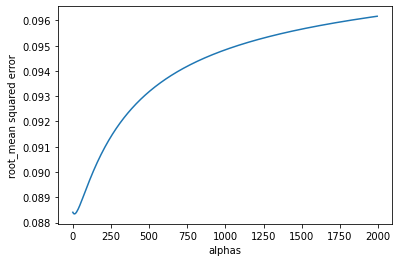

In [18]:

alphas=np.arange(0.01,2000,5)
error=[]
for alpha in alphas :
    clf = RidgeCV(alphas=[alpha])
    clf.fit(x_train,y_train)
    error.append((mean_squared_error(y_test,clf.predict(x_test)))**0.5)
    

from matplotlib.legend_handler import HandlerLine2D
line=plt.plot(alphas,error)
plt.ylabel('root_mean squared error')
plt.xlabel('alphas')
plt.show()


so we can see that best value of alphas are low (range is 0.1 to 10 according to paper)

In [19]:
rcv = RidgeCV(alphas=[0.1,1,10]) 
%time rcv.fit(x_train,y_train)
y_predict=rcv.predict(x_test)

CPU times: total: 46.9 ms
Wall time: 60.8 ms


output

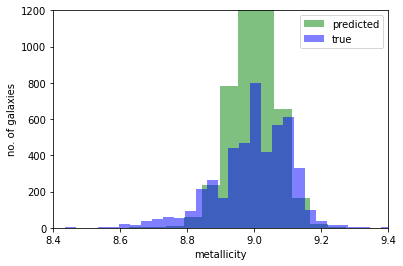

rmse value: 0.08834290311862945
r2 score: 0.4086416425869639


In [20]:
plot_and_metrics(y_test,y_predict)

removing outliers(>0.2 dex) from a data frame of predicted and test data

In [21]:
x_test_no_outliers,y_test_no_outliers=remove_outliers(x_test,y_test,y_predict)
y_predict_no_outliers=rcv.predict(x_test_no_outliers)
metrics(y_test,y_test_no_outliers,y_predict_no_outliers)

rmse value: 0.07237117837338249
r2 score: 0.5065893126278543
OLF: 0.029424040066778012


x--------------x

for data set 2

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=1)

graphical method for best parameter

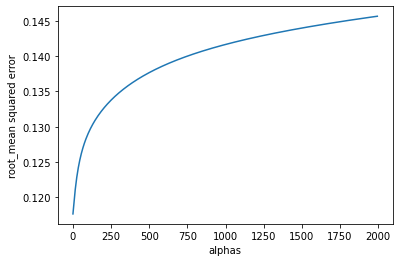

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV

alphas=np.arange(0.01,2000,5)
error=[]
for alpha in alphas :
    clf = RidgeCV(alphas=[alpha])
    clf.fit(x_train,y_train)
    error.append((mean_squared_error(y_test,clf.predict(x_test)))**0.5)
    

from matplotlib.legend_handler import HandlerLine2D
line=plt.plot(alphas,error)
plt.ylabel('root_mean squared error')
plt.xlabel('alphas')
plt.show()

therefore low values of alphas are used (10 acc. to paper)

In [24]:
rcv = RidgeCV(alphas=[0.1,1,10]) 
%time rcv.fit(x_train,y_train)
y_predict=rcv.predict(x_test)

CPU times: total: 0 ns
Wall time: 15 ms


output

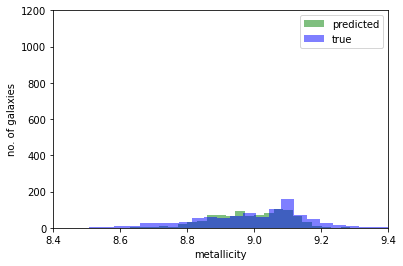

rmse value: 0.12003873752601613
r2 score: 0.5810810668383649


In [25]:
plot_and_metrics(y_test,y_predict)

removing outliers(>0.2 dex) from a data frame of predicted and test data

In [26]:
x_test_no_outliers,y_test_no_outliers=remove_outliers(x_test,y_test,y_predict)
y_predict_no_outliers=rcv.predict(x_test_no_outliers)
metrics(y_test,y_test_no_outliers,y_predict_no_outliers)

rmse value: 0.08420550459977734
r2 score: 0.6839793216896672
OLF: 0.078974358974359


# randomforest

for data set 1

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=1)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

grid search for best parameters

In [57]:
param_grid={
    'n_estimators':[10,20,40],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[2,4,6,8]
}
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3,n_jobs=-1)
CV_rfr.fit(x_train, y_train)
print(CV_rfr.best_params_)


{'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 40}


In [29]:
rfr=RandomForestRegressor(n_estimators=40,min_samples_leaf=8,min_samples_split=2)
%time rfr.fit(x_train,y_train)
y_predict=rfr.predict(x_test)

CPU times: total: 13.8 s
Wall time: 14 s


output

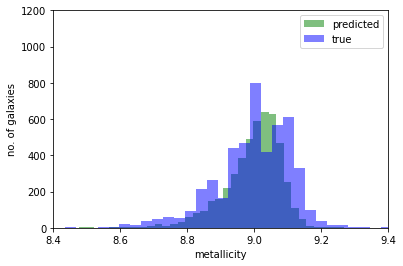

rmse value: 0.08112533029614172
r2 score: 0.501321825399105


In [30]:
plot_and_metrics(y_test,y_predict)

removing outliers(>0.2 dex) from a data frame of predicted and test data

In [31]:
x_test_no_outliers,y_test_no_outliers=remove_outliers(x_test,y_test,y_predict)
y_predict_no_outliers=rfr.predict(x_test_no_outliers)
metrics(y_test,y_test_no_outliers,y_predict_no_outliers)


rmse value: 0.06949348356132704
r2 score: 0.570179368849602
OLF: 0.025876460767946585


x------------------x

for data set 2

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=1)

In [219]:
param_grid={
    'n_estimators':[10,20,40],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[2,4,6,8]
}
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3,n_jobs=-1)
CV_rfr.fit(x_train, y_train)
print(CV_rfr.best_params_)

{'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 40}


In [33]:
rfr=RandomForestRegressor(n_estimators=40,min_samples_leaf=8,min_samples_split=2)
%time rfr.fit(x_train,y_train)
y_predict=rfr.predict(x_test)

CPU times: total: 1.89 s
Wall time: 1.93 s


output

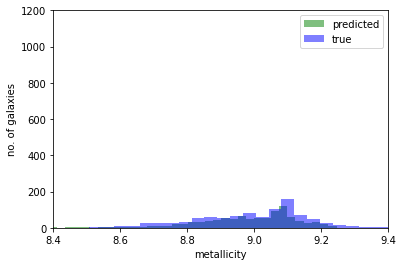

rmse value: 0.11230817689997982
r2 score: 0.6333008483370082


In [34]:
plot_and_metrics(y_test,y_predict)

removing outliers(>0.2 dex) from a data frame of predicted and test data

In [35]:
x_test_no_outliers,y_test_no_outliers=remove_outliers(x_test,y_test,y_predict)
y_predict_no_outliers=rfr.predict(x_test_no_outliers)
metrics(y_test,y_test_no_outliers,y_predict_no_outliers)

rmse value: 0.07856279201007929
r2 score: 0.7443191766366709
OLF: 0.06666666666666665


# Extremely randomized Trees

for data set 1

In [41]:
x_train,x_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=1)

In [42]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

In [230]:
param_grid={
    'n_estimators':[10,50,100],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[2,4,6,8]
}
CV_etr = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=param_grid, cv=3,n_jobs=-1)
CV_etr.fit(x_train, y_train)
print(CV_etr.best_params_)

{'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}


In [43]:
etr=ExtraTreesRegressor(n_estimators=100,min_samples_leaf=8,min_samples_split=8)
%time etr.fit(x_train,y_train)
y_predict=etr.predict(x_test)

CPU times: total: 5.58 s
Wall time: 5.67 s


output

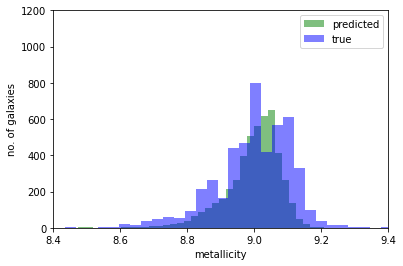

rmse value: 0.08040224706782248
r2 score: 0.5101718071027367


In [44]:
plot_and_metrics(y_test,y_predict)

removing outliers from test data frame

In [45]:
x_test_no_outliers,y_test_no_outliers=remove_outliers(x_test,y_test,y_predict)
y_predict_no_outliers=etr.predict(x_test_no_outliers)
metrics(y_test,y_test_no_outliers,y_predict_no_outliers)


rmse value: 0.06906110700758283
r2 score: 0.5729665476772617
OLF: 0.023998330550918157


x----------------x

for data set 2

In [46]:
x_train,x_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=1)

In [267]:
param_grid={
    'n_estimators':[10,50,100],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[2,4,6,8]
}
CV_etr = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=param_grid, cv=3,n_jobs=-1)
CV_etr.fit(x_train, y_train)
print(CV_etr.best_params_)

{'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 50}


In [47]:
etr=ExtraTreesRegressor(n_estimators=50,min_samples_leaf=4,min_samples_split=4)
%time etr.fit(x_train,y_train)
y_predict=etr.predict(x_test)

CPU times: total: 609 ms
Wall time: 614 ms


output

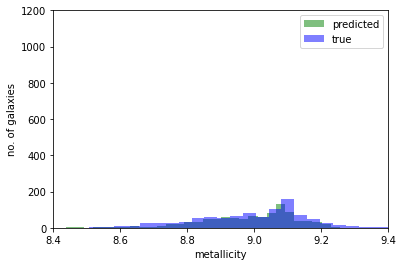

rmse value: 0.10481497972193239
r2 score: 0.6806007737232399


In [48]:
plot_and_metrics(y_test,y_predict)

removing outliers from test data frame

In [49]:
x_test_no_outliers,y_test_no_outliers=remove_outliers(x_test,y_test,y_predict)
y_predict_no_outliers=etr.predict(x_test_no_outliers)
metrics(y_test,y_test_no_outliers,y_predict_no_outliers)

rmse value: 0.07740344670965438
r2 score: 0.7583836042438326
OLF: 0.06153846153846154


# Adaboost

for data set 1

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=1)

In [51]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [25]:
param_grid={
    'n_estimators':[10,50,100],
    'loss':['linear','square','exp'],
    'base_estimator':[DecisionTreeRegressor(max_depth=1),DecisionTreeRegressor(max_depth=2),DecisionTreeRegressor(max_depth=4),DecisionTreeRegressor(max_depth=6),DecisionTreeRegressor(max_depth=8),DecisionTreeRegressor(max_depth=10)]
}
CV_etr = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=param_grid, cv=3,n_jobs=-1)
CV_etr.fit(x_train, y_train)
print(CV_etr.best_params_)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
54 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 1062, in fit
    raise ValueError("loss must be 'linear', 'square', or 'exponential'")
ValueError: loss must be 'linear',

{'base_estimator': DecisionTreeRegressor(max_depth=10), 'loss': 'linear', 'n_estimators': 10}


In [52]:
ada=AdaBoostRegressor(n_estimators=10 ,loss='linear',base_estimator=(DecisionTreeRegressor(max_depth=10)) )
%time ada.fit(x_train,y_train)
y_predict=ada.predict(x_test)

CPU times: total: 4 s
Wall time: 4.17 s


output

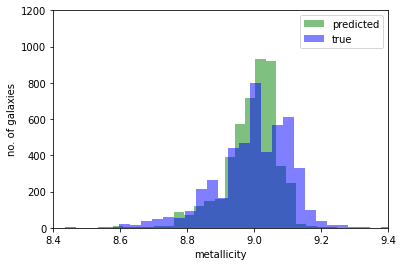

rmse value: 0.08242786067329576
r2 score: 0.48517993897051126


In [53]:
plot_and_metrics(y_test,y_predict)

removing outliers(>0.2 dex)

In [54]:
x_test_no_outliers,y_test_no_outliers=remove_outliers(x_test,y_test,y_predict)
y_predict_no_outliers=ada.predict(x_test_no_outliers)
metrics(y_test,y_test_no_outliers,y_predict_no_outliers)

rmse value: 0.07135398096687381
r2 score: 0.5476514491150741
OLF: 0.024207011686143587


x-------------------x

for data set 2

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=1)

In [38]:
param_grid={
    'n_estimators':[10,50,100],
    'loss':['linear','square','exp'],
    'base_estimator':[DecisionTreeRegressor(max_depth=1),DecisionTreeRegressor(max_depth=2),DecisionTreeRegressor(max_depth=4),DecisionTreeRegressor(max_depth=6),DecisionTreeRegressor(max_depth=8),DecisionTreeRegressor(max_depth=10)]
}
CV_etr = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=param_grid, cv=3,n_jobs=-1)
CV_etr.fit(x_train, y_train)
print(CV_etr.best_params_)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
54 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 1062, in fit
    raise ValueError("loss must be 'linear', 'square', or 'exponential'")
ValueError: loss must be 'linear',

{'base_estimator': DecisionTreeRegressor(max_depth=8), 'loss': 'square', 'n_estimators': 50}


In [56]:
ada=AdaBoostRegressor(n_estimators=50 ,loss='square',base_estimator=(DecisionTreeRegressor(max_depth=8)) )
%time ada.fit(x_train,y_train)
y_predict=ada.predict(x_test)

CPU times: total: 2.02 s
Wall time: 2.05 s


output

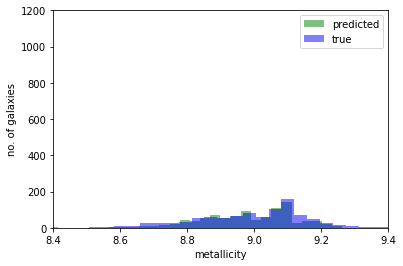

rmse value: 0.1083494090935906
r2 score: 0.6586968907057127


In [57]:
plot_and_metrics(y_test,y_predict)

removing outliers from test data

In [58]:
x_test_no_outliers,y_test_no_outliers=remove_outliers(x_test,y_test,y_predict)
y_predict_no_outliers=ada.predict(x_test_no_outliers)
metrics(y_test,y_test_no_outliers,y_predict_no_outliers)

rmse value: 0.07815577402738688
r2 score: 0.7632357399903045
OLF: 0.05948717948717952


# support vector machine

for data set 1

In [59]:
x_train,x_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=1)

In [60]:
from sklearn.preprocessing import StandardScaler
x_train_scaled=StandardScaler().fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled=StandardScaler().fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [61]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_distribution={
    'kernel':["linear","rbf"],
    'C':[1,10,100],
    'gamma':[0.01,0.1,0.5]
}
CV_etr = RandomizedSearchCV(estimator=SVR(), param_distribution=param_grid, cv=3,n_jobs=-1)
CV_etr.fit(x_train, y_train)
print(CV_etr.best_params_)

In [62]:
svr=SVR(kernel="rbf",C=1,gamma=0.1 )
%time svr.fit(x_train_scaled,y_train)
y_predict=svr.predict(x_test_scaled)

CPU times: total: 4.95 s
Wall time: 5.25 s


output

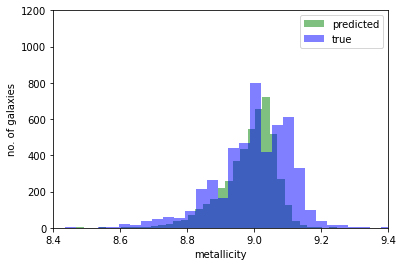

rmse value: 0.08266823461590578
r2 score: 0.482172951671629


In [63]:
plot_and_metrics(y_test,y_predict)

removing outliers

In [65]:
x_test_no_outliers,y_test_no_outliers=remove_outliers(x_test_scaled,y_test,y_predict)
y_predict_no_outliers=svr.predict(x_test_no_outliers)
metrics(y_test,y_test_no_outliers,y_predict_no_outliers)

rmse value: 0.07169821362379587
r2 score: 0.5444558933046771
OLF: 0.023580968280467407


x-------------------x

for data set 2

In [66]:
x_train,x_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=1)

In [67]:
from sklearn.preprocessing import StandardScaler
x_train_scaled=StandardScaler().fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled=StandardScaler().fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [ ]:
param_distribution={
    'kernel':["linear","rbf"],
    'C':[1,10,100],
    'gamma':[0.01,0.1,0.5]
}
CV_etr = RandomizedSearchCV(estimator=SVR(), param_distribution=param_grid, cv=3,n_jobs=-1)
CV_etr.fit(x_train_scaled, y_train)
print(CV_etr.best_params_)

In [68]:
svr=SVR(kernel="rbf",C=10,gamma=0.01)
%time svr.fit(x_train_scaled,y_train)
y_predict=svr.predict(x_test_scaled)

CPU times: total: 484 ms
Wall time: 460 ms


output

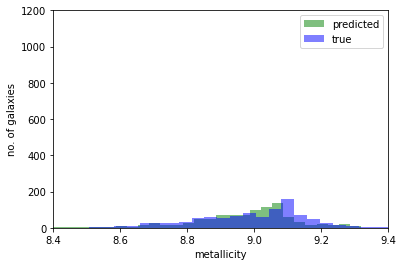

rmse value: 0.11622074650443075
r2 score: 0.607305813675999


In [69]:
plot_and_metrics(y_test,y_predict)

removing outliers(>0.2 dex) from test data frame

In [70]:
x_test_no_outliers,y_test_no_outliers=remove_outliers(x_test_scaled,y_test,y_predict)
y_predict_no_outliers=svr.predict(x_test_no_outliers)
metrics(y_test,y_test_no_outliers,y_predict_no_outliers)

rmse value: 0.08768114678414225
r2 score: 0.7132196968591762
OLF: 0.0738461538461539


x-------------------------------x

# results normalized around ridgeCV

In [71]:
result_1=pd.DataFrame(data={"Test set":["","","0.09< z <0.12","",""],'Algorithm':['ridgeCV','RandomForest','ExtremelyRandomizedTrees','AdaBoast',"SVM"],"RSME(all objects)":[0.08834,0.0811,0.0804,0.08329,0.08266],"RSME(no outliers)":[0.07327,0.06994,0.0689,0.07131,0.07169],"OLF":[0.0294,0.0242,0.02441,0.02504,0.02358],"R2":[0.4086,0.5015,0.5101,0.4742,0.4821],"fitting CPU time":[31.2,14600,5810,3970,5190]})
result_1.loc[:,"RSME(all objects)":]=result_1.loc[:,"RSME(all objects)":].div(result_1.iloc[0]["RSME(all objects)":])

result_2=pd.DataFrame(data={"Test set":["","","0.2< z <0.25","",""],'Algorithm':['ridgeCV','RandomForest','ExtremelyRandomizedTrees','AdaBoast',"SVM"],"RSME(all objects)":[0.12003,0.11104,0.10534,0.11039,0.11622],"RSME(no outliers)":[0.08420,0.07854,0.07830,0.077501,0.08768],"OLF":[0.0789,0.06358,0.05948,0.06256,0.07384],"R2":[0.5810,0.6414,0.67733,0.64568,0.6073],"fitting CPU time":[15.6,2140,797,2140,625]})
result_2.loc[:,"RSME(all objects)":]=result_2.loc[:,"RSME(all objects)":].div(result_2.iloc[0]["RSME(all objects)":])

In [72]:
result_1

,Test set,Algorithm,RSME(all objects),RSME(no outliers),OLF,R2,fitting CPU time
0,,ridgeCV,1.0,1.0,1.0,1.0,1.0
1,,RandomForest,0.918044,0.954552,0.823129,1.227362,467.948718
2,0.09< z <0.12,ExtremelyRandomizedTrees,0.91012,0.940358,0.830272,1.248409,186.217949
3,,AdaBoast,0.942835,0.97325,0.851701,1.160548,127.24359
4,,SVM,0.935703,0.978436,0.802041,1.179883,166.346154


In [73]:
result_2

,Test set,Algorithm,RSME(all objects),RSME(no outliers),OLF,R2,fitting CPU time
0,,ridgeCV,1.0,1.0,1.0,1.0,1.0
1,,RandomForest,0.925102,0.932779,0.80583,1.103959,137.179487
2,0.2< z <0.25,ExtremelyRandomizedTrees,0.877614,0.929929,0.753866,1.1658,51.089744
3,,AdaBoast,0.919687,0.920439,0.792902,1.111325,137.179487
4,,SVM,0.968258,1.04133,0.935868,1.045267,40.064103


# now using best performing model(extremely randomized trees) by including stellar mass and photometric redshift as well

In [74]:
X3 = data_set1.drop(["metallicity"],axis=1)
y3 = data_set1["metallicity"]

In [75]:
X4 = data_set2.drop(["metallicity"],axis=1)
y4= data_set2["metallicity"]

for data set 1

In [76]:
x_train,x_test,y_train,y_test = train_test_split(X3,y3,test_size=0.2,random_state=1)

In [77]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [12]:
param_grid={
    'n_estimators':[10,50,100],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[2,4,6,8]   
}
CV_etr = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=param_grid, cv=3,n_jobs=-1)
CV_etr.fit(x_train, y_train)
print(CV_etr.best_params_)

{'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 100}


In [78]:
etr=ExtraTreesRegressor(n_estimators=100,min_samples_leaf=6,min_samples_split=8)
%time etr.fit(x_train,y_train)
y_predict=etr.predict(x_test)

CPU times: total: 6.39 s
Wall time: 6.68 s


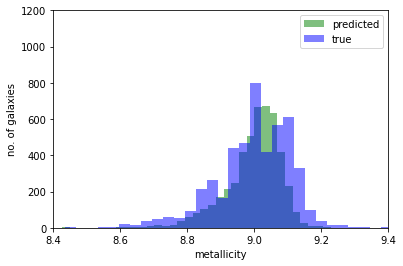

rmse value: 0.07872898861205539
r2 score: 0.5303473796738423


In [79]:
plot_and_metrics(y_test,y_predict)

removing outliers

In [80]:
x_test_no_outliers,y_test_no_outliers=remove_outliers(x_test,y_test,y_predict)
y_predict_no_outliers=etr.predict(x_test_no_outliers)
metrics(y_test,y_test_no_outliers,y_predict_no_outliers)

rmse value: 0.06842750305327217
r2 score: 0.5865356560625359
OLF: 0.02128547579298834


In [81]:
y_predict_1=y_predict
y_true_1=y_test

x------------------------x

for data set 2

In [82]:
x_train,x_test,y_train,y_test = train_test_split(X4,y4,test_size=0.2,random_state=1)

In [21]:
param_grid={
    'n_estimators':[10,50,100],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[2,4,6,8]
}
CV_etr = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=param_grid, cv=3,n_jobs=-1)
CV_etr.fit(x_train, y_train)
print(CV_etr.best_params_)

{'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 100}


In [83]:
etr=ExtraTreesRegressor(n_estimators=100,min_samples_leaf=6,min_samples_split=2)
%time etr.fit(x_train,y_train)
y_predict=etr.predict(x_test)

CPU times: total: 1.08 s
Wall time: 1.1 s


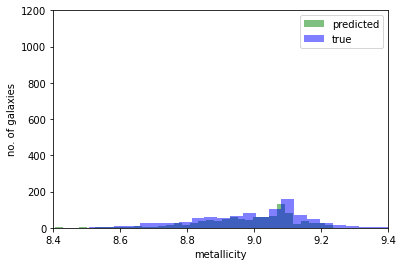

rmse value: 0.10453333929349388
r2 score: 0.6823149347817781


In [84]:
plot_and_metrics(y_test,y_predict)

removing outliers (|true - predicted|>0.2 dex)

In [85]:
x_test_no_outliers,y_test_no_outliers=remove_outliers(x_test,y_test,y_predict)
y_predict_no_outliers=etr.predict(x_test_no_outliers)
metrics(y_test,y_test_no_outliers,y_predict_no_outliers)


rmse value: 0.07716334873909471
r2 score: 0.7566285011220562
OLF: 0.05948717948717952


In [86]:
y_predict_2=y_predict
y_true_2=y_test

# photometric(predicted) Vs spectroscopic(true) metallicity

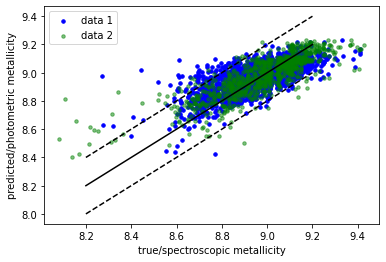

In [87]:
plt.scatter(y_true_1,y_predict_1,color="blue",alpha=1,s=12,label="data 1")
plt.scatter(y_true_2,y_predict_2,color="green",alpha=0.5,s=12,label="data 2")
plt.plot([8.2,9.2],[8.2,9.2],color="black")
plt.plot([8.2,9.2],[8.4,9.4],color="black",linestyle='dashed')
plt.plot([8.2,9.2],[8,9],color="black",linestyle='dashed')
plt.ylabel('predicted/photometric metallicity')
plt.xlabel('true/spectroscopic metallicity')
plt.legend()
plt.show()

solid line:  1:1 correspondence and dashed line: 0.2 dex deviation

# importance of features

ranking of feature by inversing rsme value and normalising them

In [88]:
def normalised_rsme_ranking(x_train,x_test,y_train,y_test):     # defining a function to plot rank of features via rsme of test data
   error=[]
   for col in (x_train.columns):             #fitting all features one by one
     etr=ExtraTreesRegressor()
     x_tr=x_train[col]
     x_tr=x_tr.values.reshape(-1,1)
     x_te=x_test[col]
     x_te=x_te.values.reshape(-1,1)
    
     etr.fit(x_tr,y_train)
     pred=etr.predict(x_te)
     rsme=(mean_squared_error(y_test,pred))**0.5
     error.append([col,(rsme)])
   error=pd.DataFrame(error,columns=["features","rsme"])    # dataframe of features and rsme values we get
   
   error["1/rsme"]=1/(error["rsme"])                 # inversing rsme values and normalising them
   factor=1/((error["1/rsme"]).sum())
   error['ranking']=error["1/rsme"].mul(factor)
   error.drop(["rsme","1/rsme"],axis=1,inplace=True)
   error.sort_values(by = 'ranking',ascending=False, inplace = True)
   error.plot.bar(x="features")             # plotting them
 

for data set 1

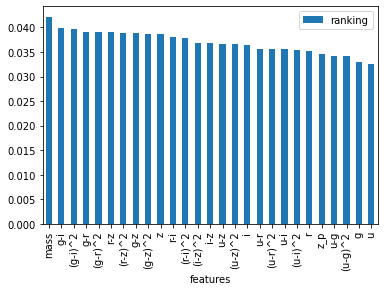

In [89]:
x_train,x_test,y_train,y_test = train_test_split(X3,y3,test_size=0.2,random_state=1)
normalised_rsme_ranking(x_train,x_test,y_train,y_test)

for data set 2

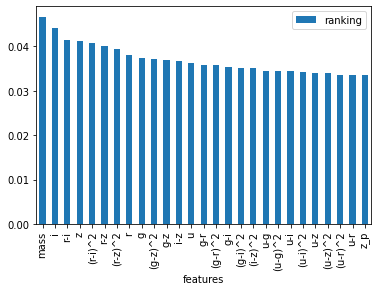

In [90]:
x_train,x_test,y_train,y_test = train_test_split(X4,y4,test_size=0.2,random_state=1)
normalised_rsme_ranking(x_train,x_test,y_train,y_test)

ranking of features by just fitting them in ExtratreeRegressor

In [100]:
def ranking_of_features(x_train,x_test,y_train,y_test):   # defining a function to get ranking and metrics by fitting all features one by one
   etr=ExtraTreesRegressor(n_jobs=-1).fit(x_train,y_train)
   feature_importances = pd.DataFrame(etr.feature_importances_, index =x_train.columns,  columns=['importance']).sort_values('importance', ascending=False)
   feature_importances.plot.bar()    # plotting ranking based on their importance   
   plt.show()
    
   # now sorting train data columns according to their ranking
   imp_fet=feature_importances                    
   imp_fet["feature"]=imp_fet.index
   imp_fet=imp_fet.reset_index(drop=True)
   imp_fet=imp_fet.transpose()
   imp_fet.rename(columns=imp_fet.iloc[1,:],inplace=True)
   imp_fet.drop("feature",inplace=True)
   train_imp=pd.concat([x_train,imp_fet],join="outer",axis=0)
   train_imp.sort_values(by="importance",axis=1,ascending=False,inplace=True)
   train_imp.drop("importance",axis=0,inplace=True)
    
   # sorting test data columns according to their ranking
   imp_fet=feature_importances
   imp_fet["feature"]=imp_fet.index
   imp_fet=imp_fet.reset_index(drop=True)
   imp_fet=imp_fet.transpose()
   imp_fet.rename(columns=imp_fet.iloc[1,:],inplace=True)
   imp_fet.drop("feature",inplace=True)
   test_imp=pd.concat([x_test,imp_fet],join="outer",axis=0)
   test_imp.sort_values(by="importance",axis=1,ascending=False,inplace=True)
   test_imp.drop("importance",axis=0,inplace=True)

   metrics=[]             # defining a list to store values of metrics(rsme,r2,fraction of outliers)
   for i in range(len(train_imp.columns)):    # starting from first column and successively adding next column to fit and test to check metrics
      etr=ExtraTreesRegressor(n_jobs=-1)
      etr.fit(train_imp.iloc[:,0:i+1],y_train)
      pred=etr.predict(test_imp.iloc[:,0:i+1])
      rsme=(mean_squared_error(y_test,pred))**0.5
      r2=r2_score(y_test,pred)
      y_predict_data=pd.DataFrame(pred,columns=["pred"])
      y_test_frame=pd.DataFrame(y_test)
      y_test_frame.reset_index(inplace=True,drop=True)
      frame = pd.concat([y_test_frame,y_predict_data], axis=1)
      frame.drop(frame[((frame['metallicity']-frame['pred'])**2 )>0.04 ].index,inplace=True)
      olf=1-(len(frame)/len(y_test))
      metrics.append([rsme,r2,olf])
    
   metrics=pd.DataFrame(metrics,columns=["rsme","r2","olf"])     
   plt.scatter(metrics.index,metrics["rsme"],s=200,label="rsme")     # plotting the graph
   plt.scatter(metrics.index,metrics["r2"],s=200,label="r2")
   plt.scatter(metrics.index,metrics["olf"],s=200,label="olf")
   plt.legend()
   plt.show()       


for data set 1

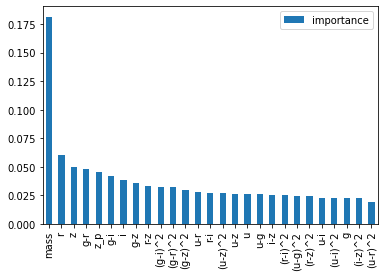

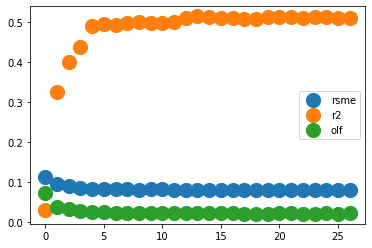

In [102]:
x_train,x_test,y_train,y_test = train_test_split(X3,y3,test_size=0.2,random_state=1)
ranking_of_features(x_train,x_test,y_train,y_test)

for data set 2

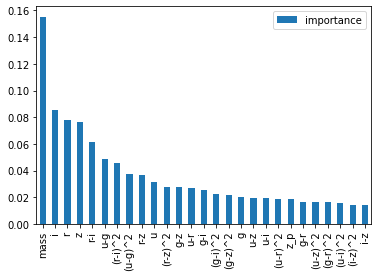

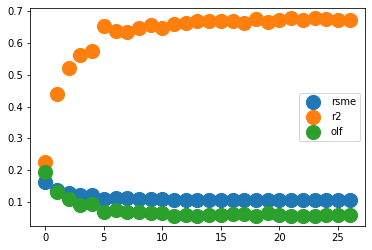

In [97]:
x_train,x_test,y_train,y_test = train_test_split(X4,y4,test_size=0.2,random_state=1)
ranking_of_features(x_train,x_test,y_train,y_test)